In [1]:
from scripts.shared_utilities import *

2024-06-03 15:38:47.929859: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 15:38:47.932513: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 15:38:47.973812: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-03 15:38:48.772426: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
model = KerasLSTMModel(path=Path("../models/modello-passi-LSTM.keras"),load=True)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 30)             │         3,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,991 (15.59 KB)

 Trainable params: 3,991 (15.59 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
data = DateStepData()
data.get_dataset().head()

uuid      date    steps  sleep_score  \
0  1003e58667235e01b49008155604980b3900b00e  0.332418  3049.04          NaN   
1  1003e58667235e01b49008155604980b3900b00e  0.335165  4309.81     0.547576   
2  1003e58667235e01b49008155604980b3900b00e  0.337912   255.11          NaN   
3  1003e58667235e01b49008155604980b3900b00e  0.340659  5118.07          NaN   
4  1003e58667235e01b49008155604980b3900b00e  0.343407  2228.88     0.415384   

    n_steps  n_sleep_score  n_steps_all  n_sleep_score_all  
0 -0.466397            NaN    -0.866270                NaN  
1 -0.185709      -0.571941    -0.600012          -0.367737  
2 -1.088416            NaN    -1.456310                NaN  
3 -0.005764            NaN    -0.429319                NaN  
4 -0.648991      -1.367748    -1.039477          -1.259176

In [4]:
utils = Utilities(model, data)

In [5]:
utils.train_model()

Epoch 1/20
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.6614 - r2_score: 0.3453 - val_loss: 0.6015 - val_r2_score: 0.3359
Epoch 2/20
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.6207 - r2_score: 0.3762 - val_loss: 0.6019 - val_r2_score: 0.3355
Epoch 3/20
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.6290 - r2_score: 0.3746 - val_loss: 0.5972 - val_r2_score: 0.3407
Epoch 4/20
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.6343 - r2_score: 0.3770 - val_loss: 0.5989 - val_r2_score: 0.3388
Epoch 5/20
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.6288 - r2_score: 0.3753 - val_loss: 0.5945 - val_r2_score: 0.3437
Epoch 6/20
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.6209 - r2_score: 0.3808 - val_loss: 0.5926 - val_r2_score: 0.3458
Epoch 7/20
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.6198 - r2_score: 0.3835 - val_loss: 0.5897 - val_r2_score: 0.3489
Epoch 8/20
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 0.6087 - r2_scor

In [4]:
utils.evaluate_model()

NameError: name 'utils' is not defined

In [7]:
model.save()

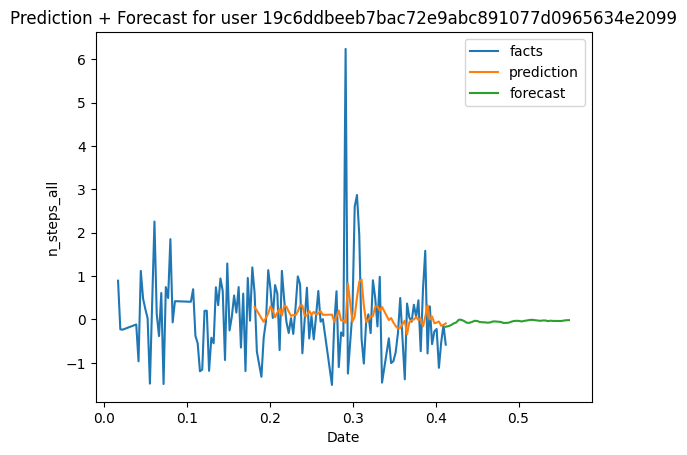

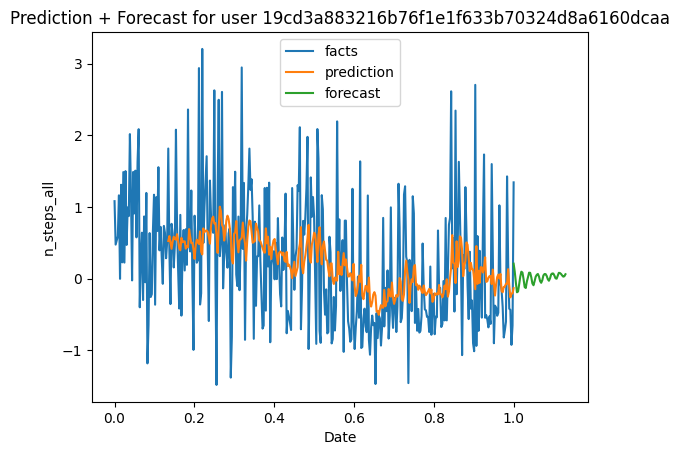

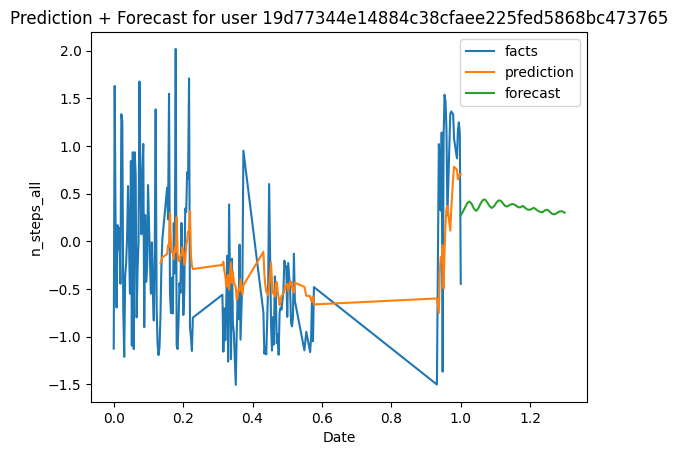

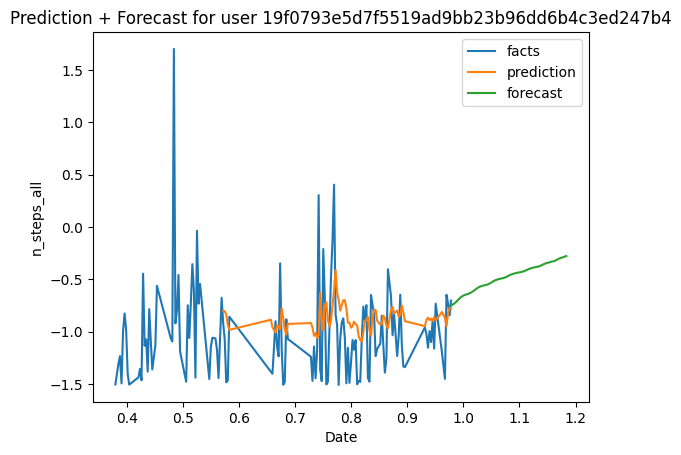

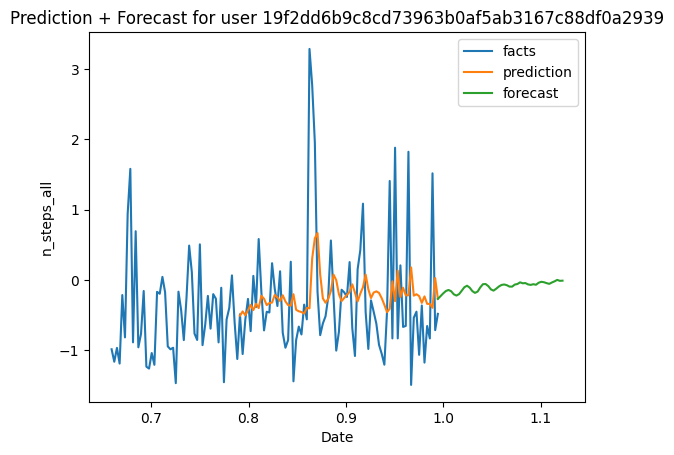

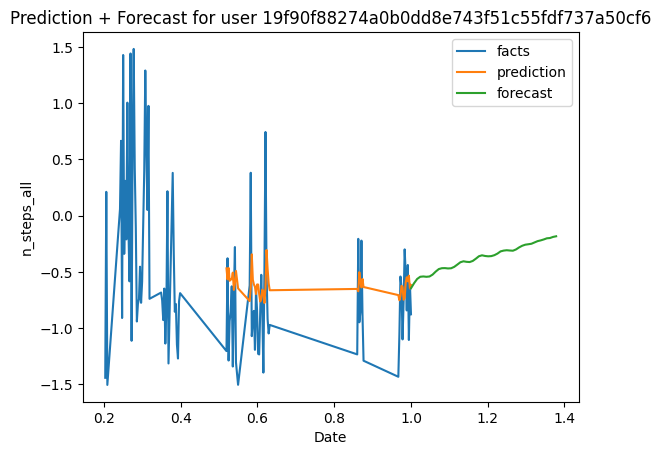

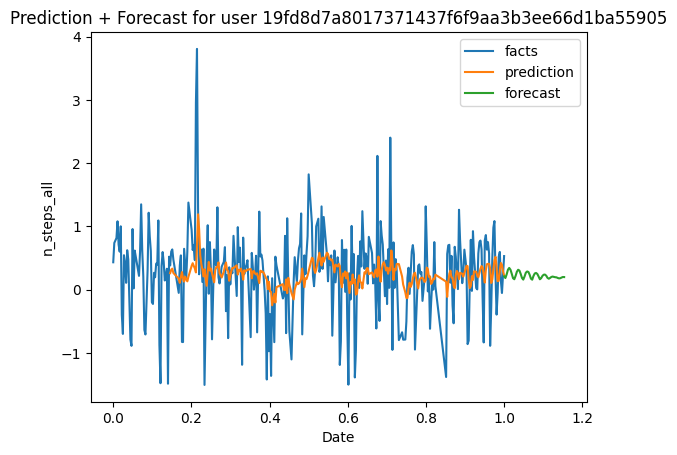

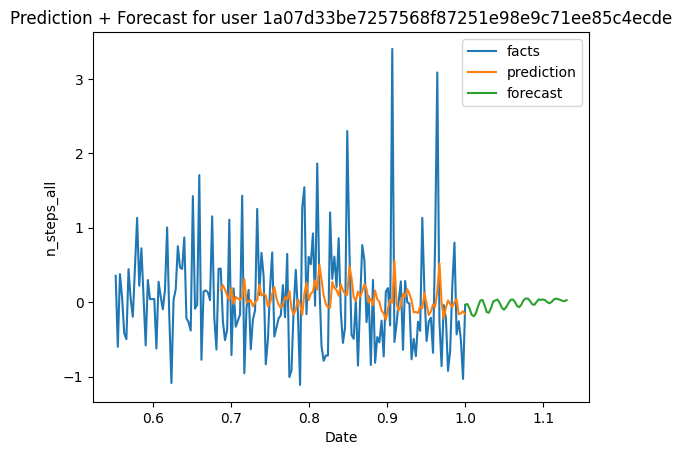

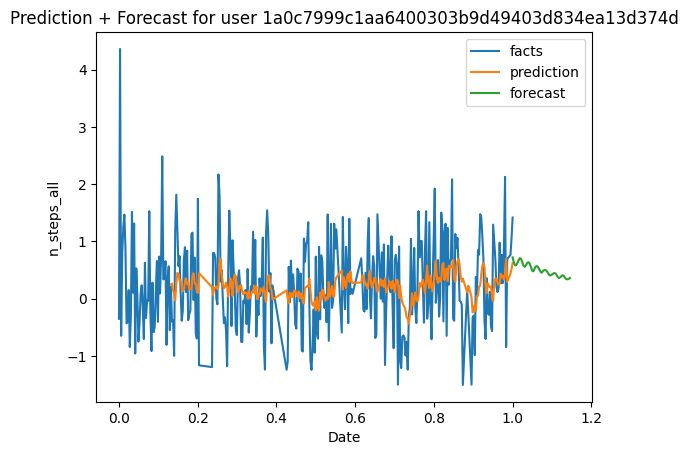

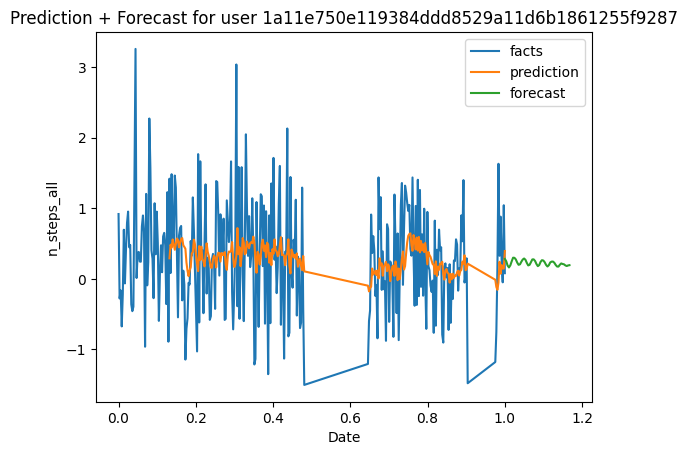

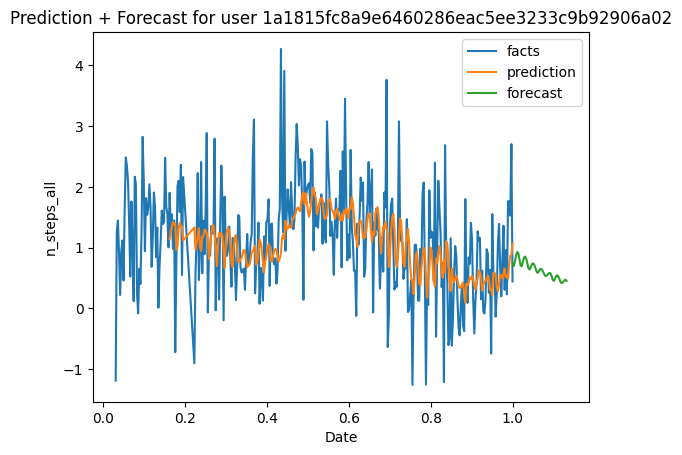

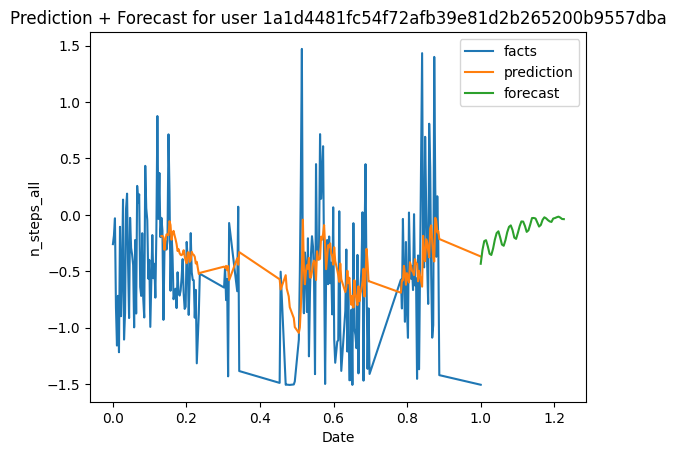

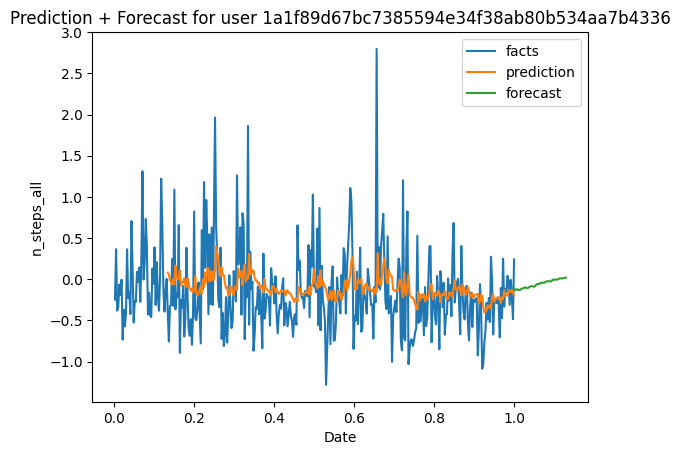

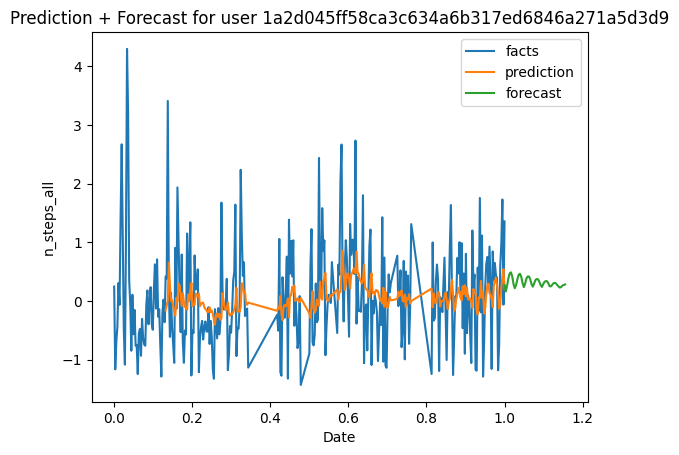

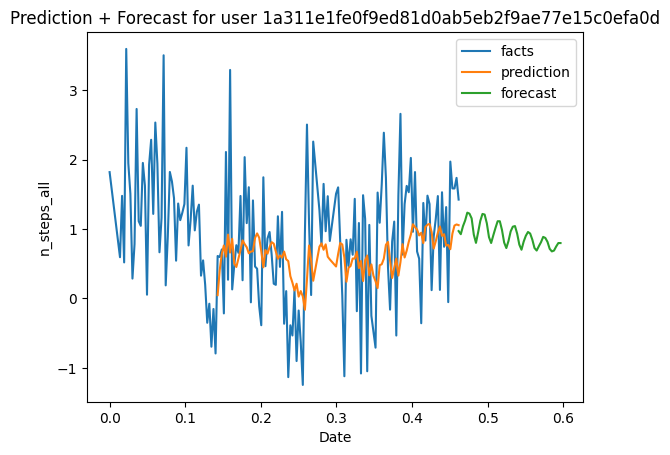

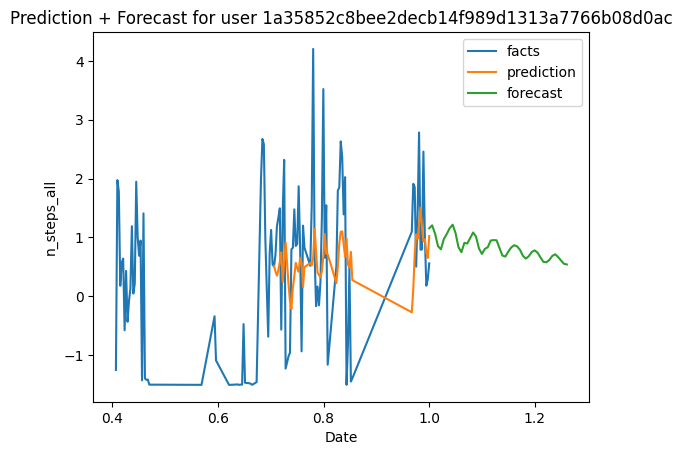

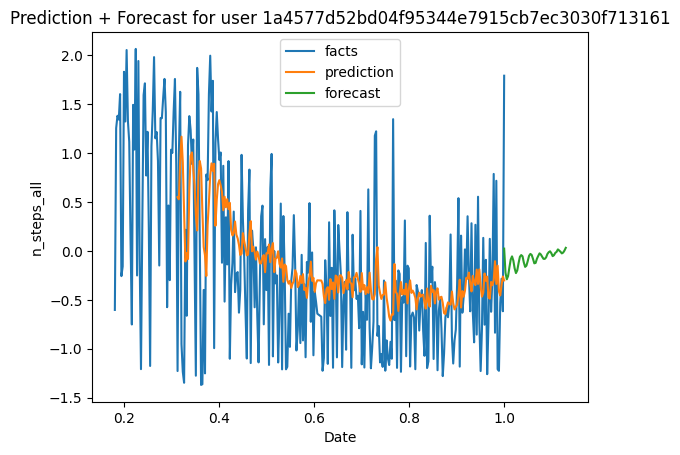

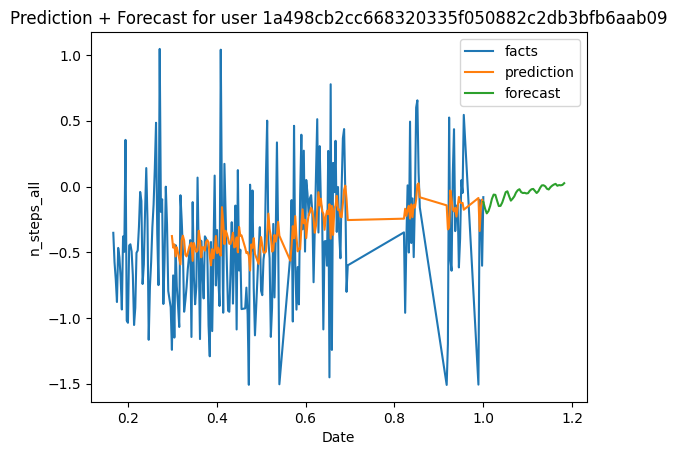

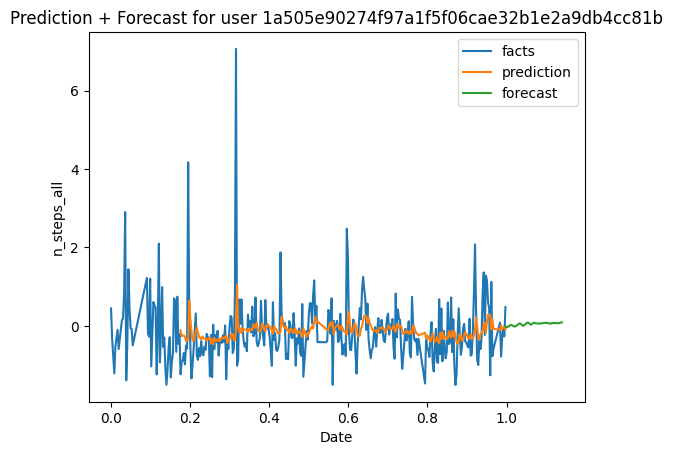

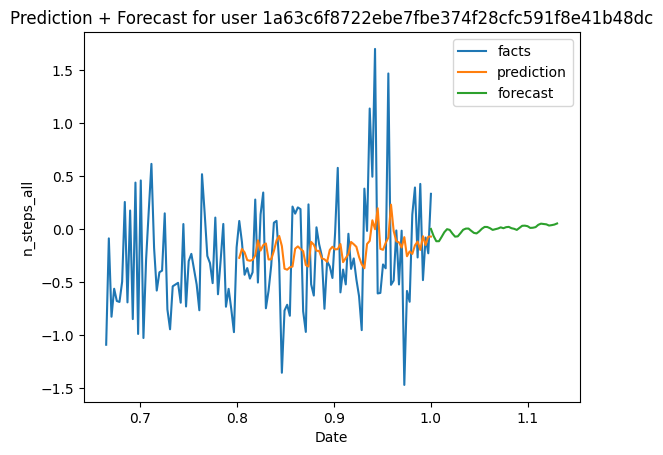

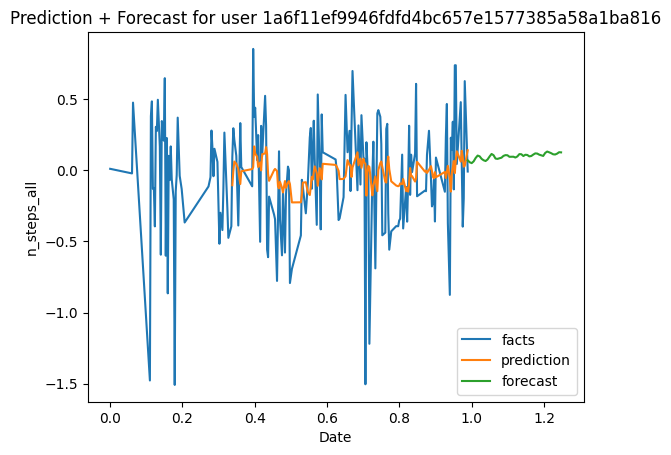

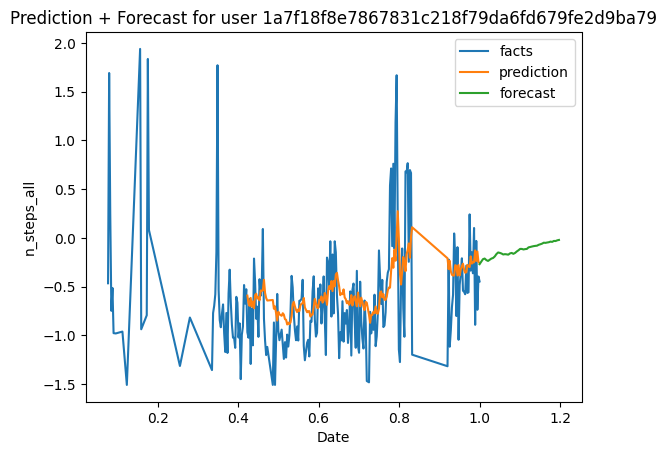

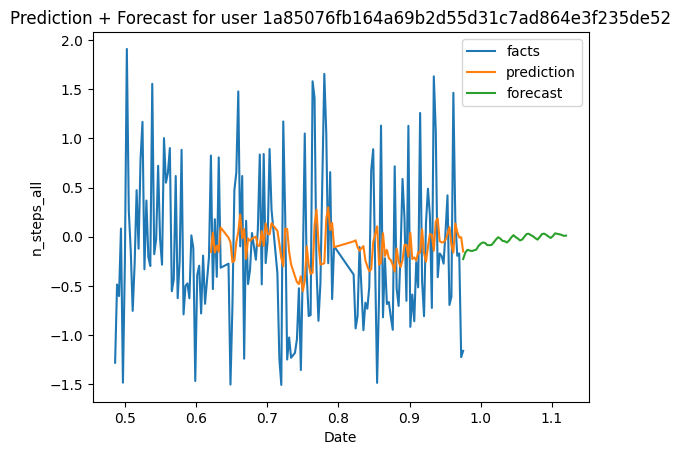

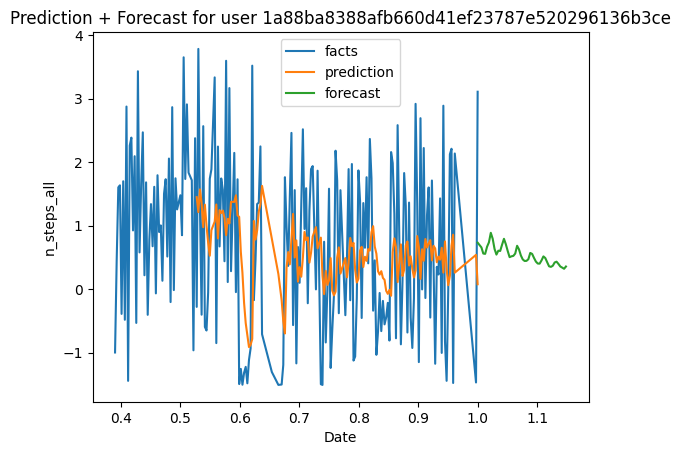

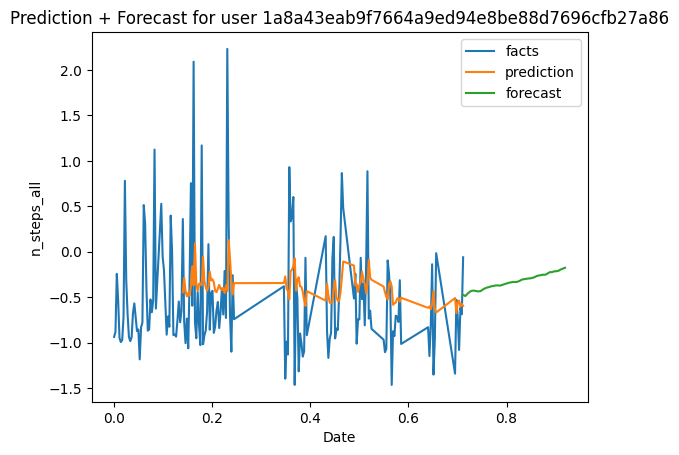

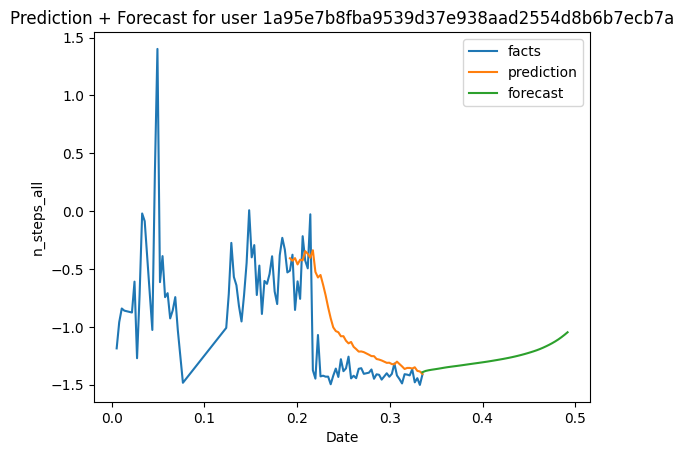

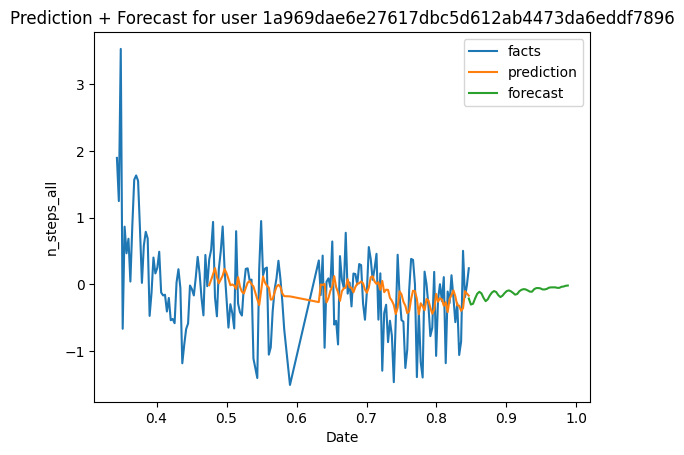

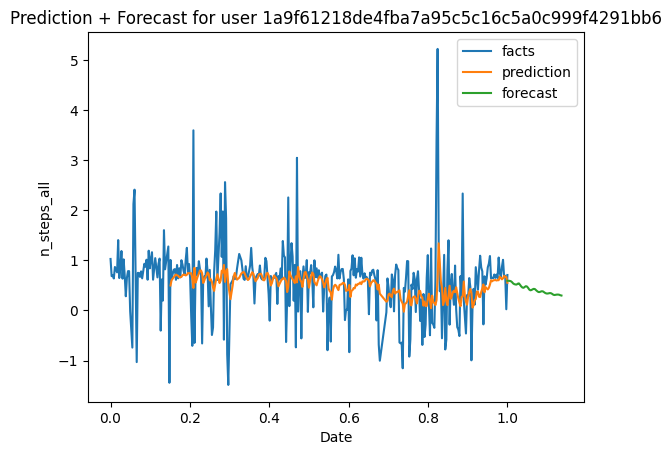

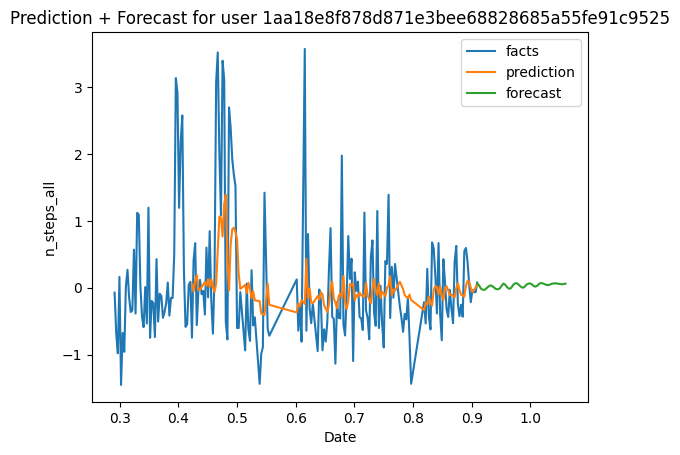

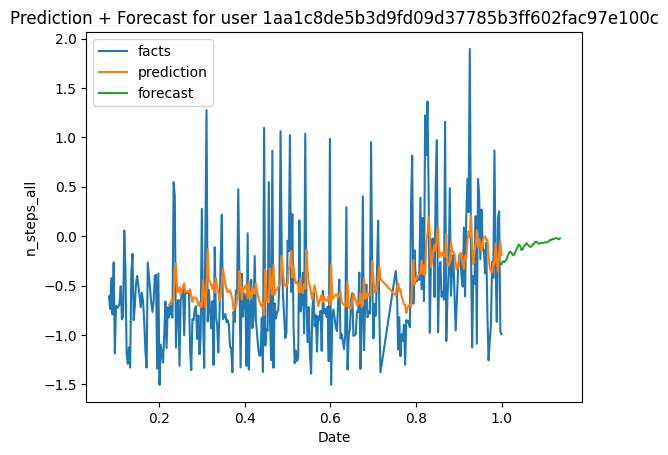

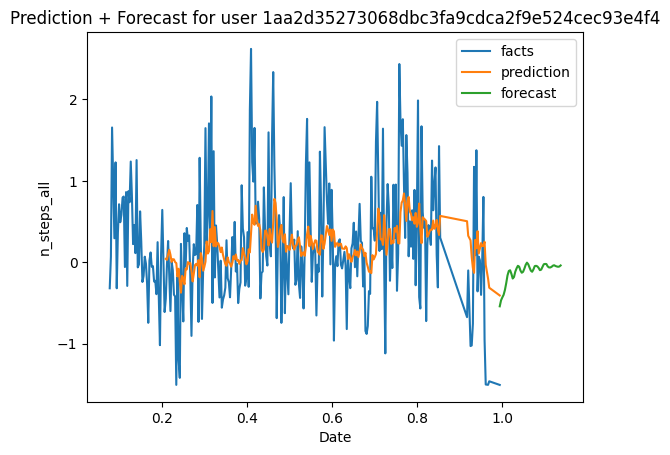

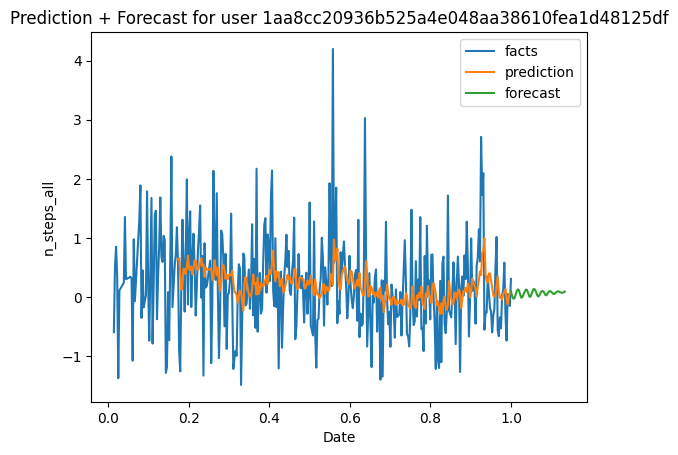

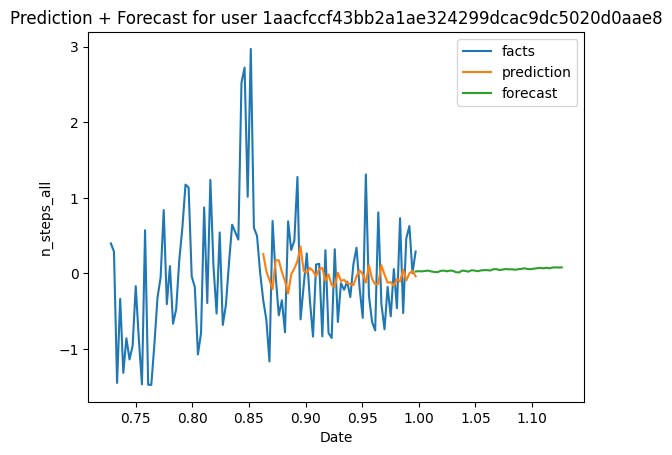

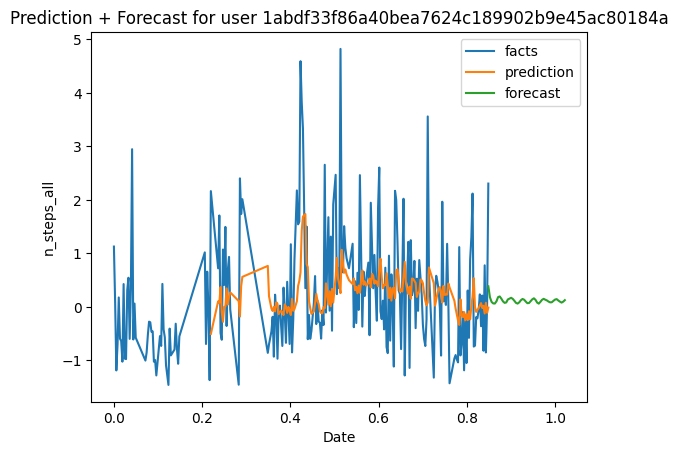

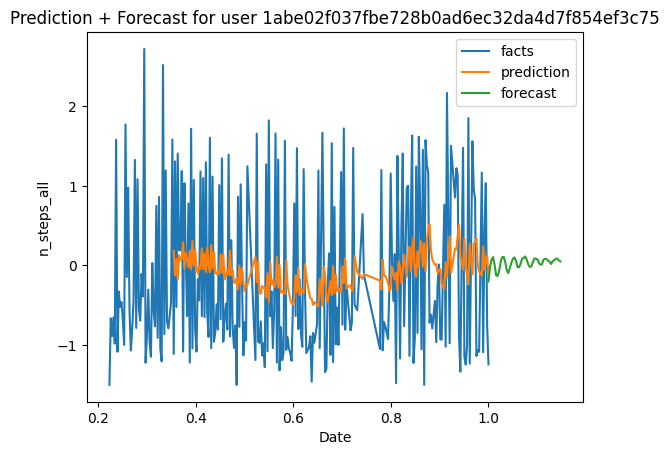

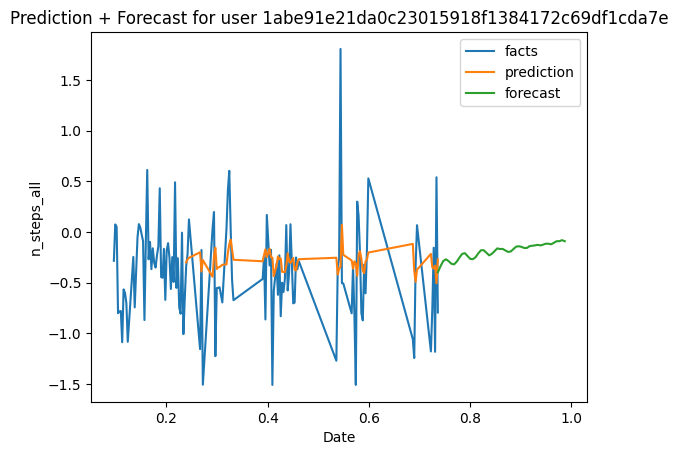

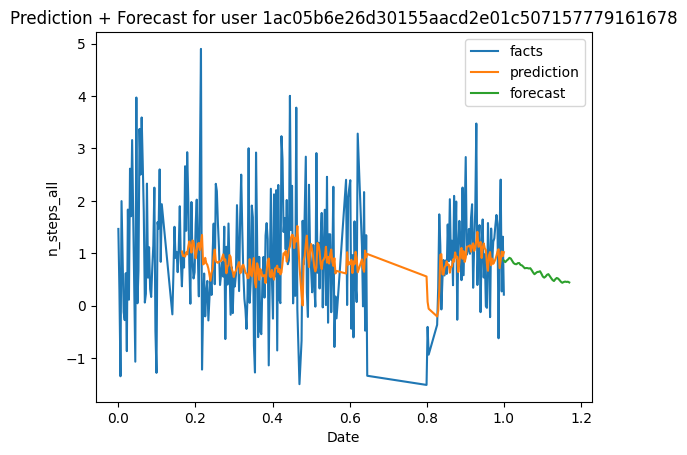

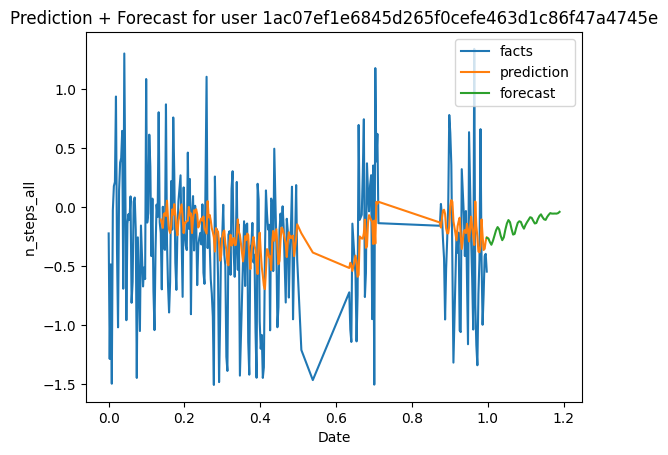

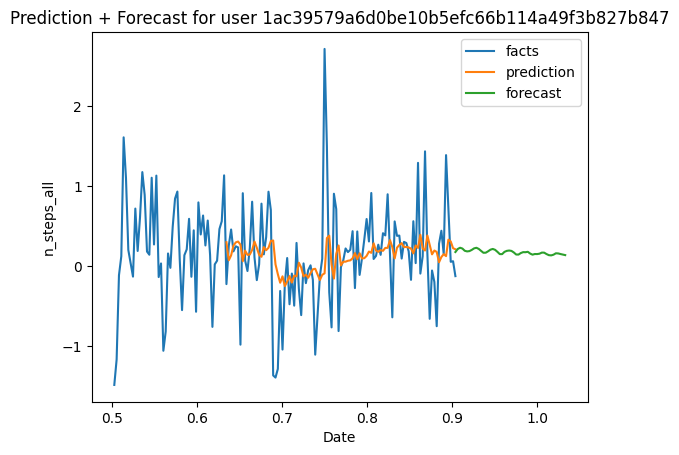

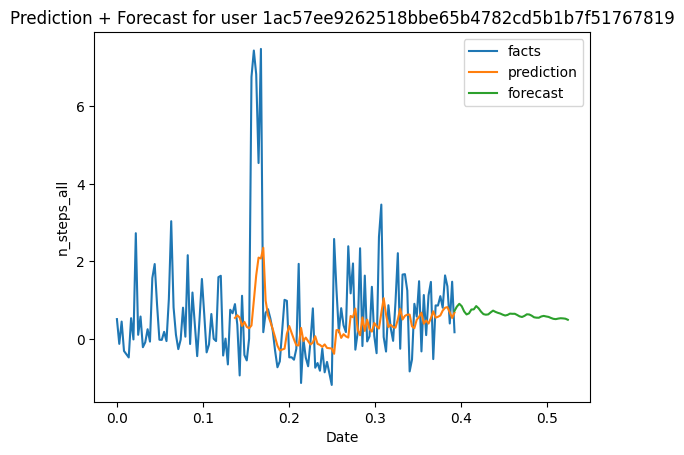

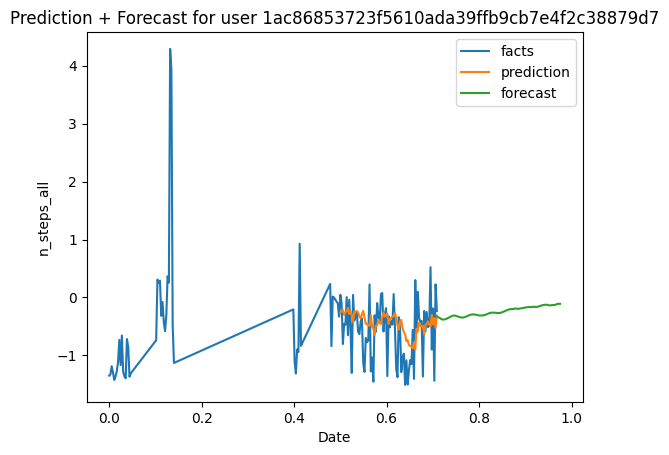

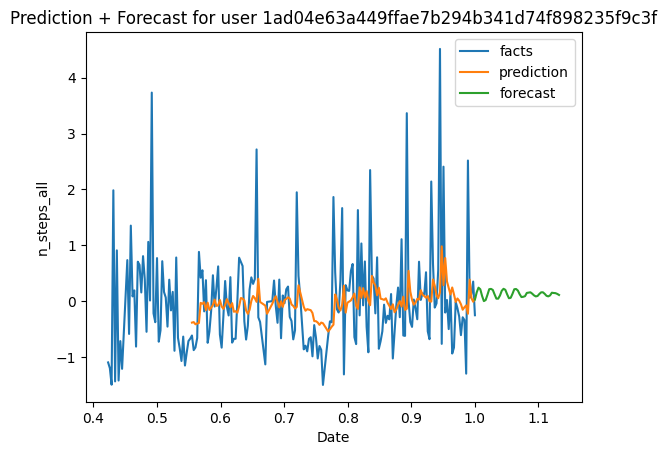

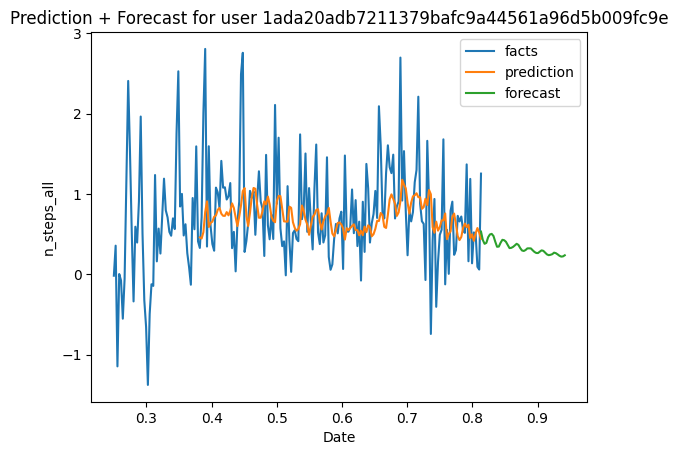

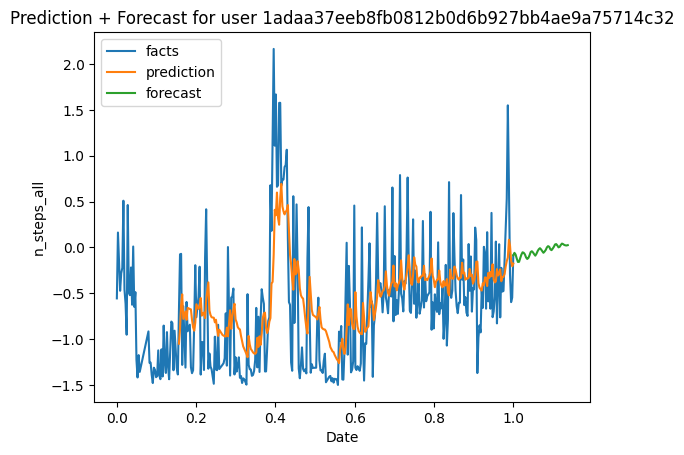

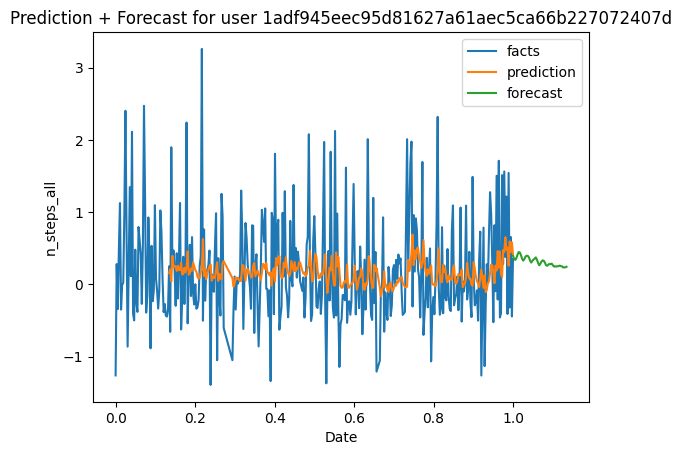

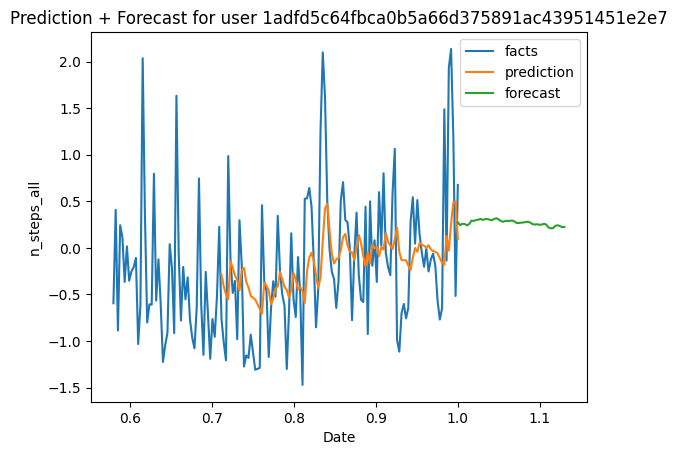

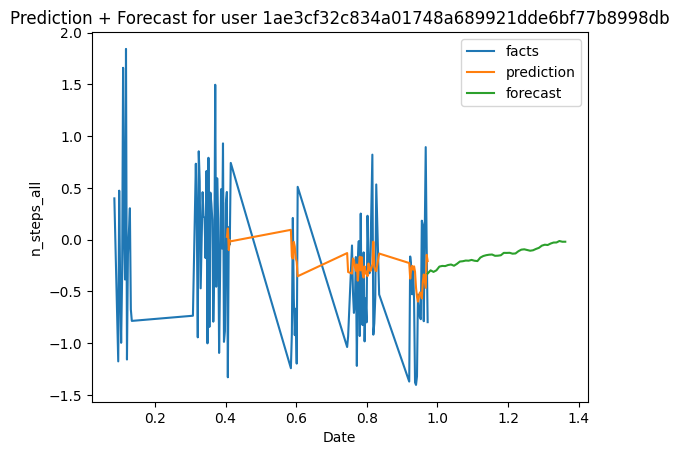

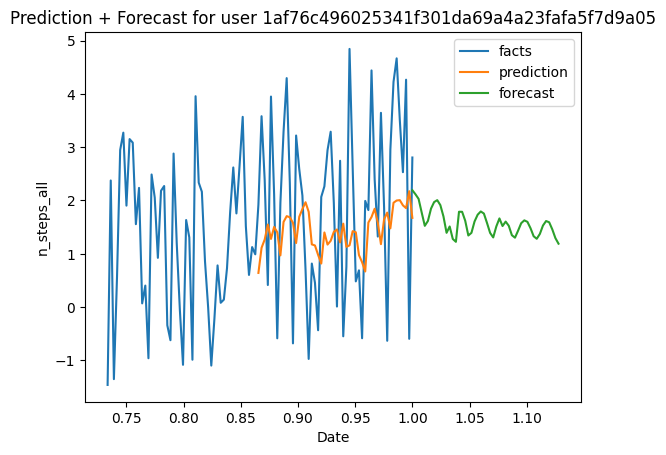

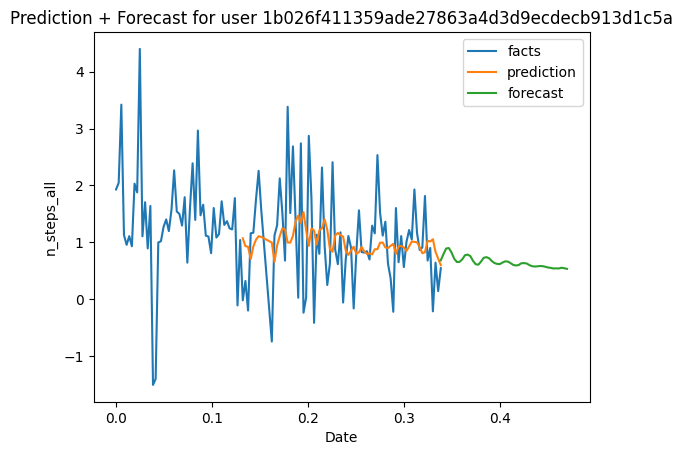

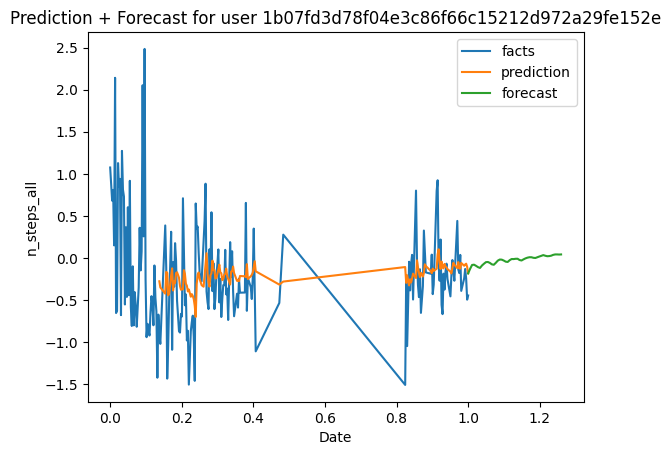

In [5]:
DateStepPredictionForecastVisualization(model, DateStepData(chunk_start=DEFAULT_CHUNK_START+DEFAULT_CHUNK_SIZE)).visualize()